<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/tree/2021/notebooks/Python_chapter_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#クラスタリング


In [ ]:
#この章で使うライブラリを予めインポートしておく
import numpy as np ## numpyというライブラリをインポートしてnpという名前で使う
from matplotlib import pyplot as plt 

#### １次元のクラスタリング

以下のような１次元データを考えます。

In [ ]:
data = [-4.3, -3.1, -0.5, 0.0, 3.8, 5.3]
mu_c = 2.0 ## mu candidate

図にしてみましょう。  
(とりあえず詳細を理解する必要はありませんから、以下のコードを実行してください)

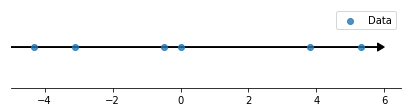

In [ ]:
data = np.array([-4.3, -3.1, -0.5, 0.0, 3.8, 5.3])
fig = plt.figure(figsize=(7,1.5))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([-5,6.5]);ax.set_ylim([-0.5,0.5])
ax.arrow(x=-5,y=0,dx=11,dy=0,width=0.0001,head_width=0.1,head_length=0.2,length_includes_head=True,color='k')
ax.spines["right"].set_color("none") # 右消し                                                                                                                                                                                    
ax.spines["left"].set_color("none")  # 左消し                                                                                                                                                                                    
ax.spines["top"].set_color("none")  # 上消し                                                                                                                                                                                    
ax.scatter(data,0*data,label="Data",alpha=0.8,zorder=3000)
ax.set_yticks([])
ax.legend()
plt.show()
plt.close()


これを3つのクラスターに分類せよと言われれば簡単でしょう。  
左の2つ、真ん中の２つ、右の2つですね？  

ただ一般のデータではそう簡単には行きませんので、講義でならったように距離の二乗和を計算する必要があるでしょうから、そのためのコードを書いてみましょう。

まずは簡単のため、クラスターの数が1個として、
クラスターの中心を2.0にとってみます。   

6つのデータそれぞれと2.0との距離は以下のように計算できます

In [ ]:
data = [-4.3, -3.1, -0.5, 0.0, 3.8, 5.3] ## 念の為再定義
total = 0.0 ## 二乗和の値を足していく変数を定義
mu_c = 2.0 
for tmp in data:
  total += (tmp-mu_c)**2
print(total)


90.07999999999998



---

**補足**  
numpyライブラリを使うと、上のコードは

In [ ]:
data = np.array([-4.3, -3.1, -0.5, 0.0, 3.8, 5.3])
mu_c = 2.0 
total = np.sum( (data-mu_c)**2 )
print(total)

90.07999999999998


と簡略化できます。 data-mu_cでは、各要素からmu_cを引いたndarrayが作成され  

sum関数で、要素の全合計を計算します　

---




クラスターの割当が決まっている場合、距離の二乗和を最小化する点は、  
同一のクラスターに所属するデータの平均値に一致します。  
データの平均値を取得して、二乗和を計算してみます。

In [ ]:
mu = np.mean(np.array(data))
total = 0.0 ## 値の初期化
for tmp in data:
  total += (tmp-mu)**2
print(total)

70.63999999999999


これまでのデータを3つのクラスターに分類したい場合も同様に距離の二乗和を計算します。  
ただし、クラスターの数がK個あるときは、K個のクラスター中心を定義しなければなりませんし、それぞれのデータがどのクラスターに所属しているかという情報も必要です。

講義で話したように、今の場合はクラスターの中心も予め([-3.7, -0.25, 4.55])と見積もれますから、
距離の二乗の総和を求めると、以下のようになります。  


In [ ]:
data= [ np.array([-4.3, -3.1]), np.array([-0.5, 0.0]), np.array([3.8, 5.3]) ]
mu = np.array([-3.7, -0.25, 4.55])
total = 0.0
for knum in range(3):
  total += np.sum( (data[knum] - mu[knum])**2 )
print(total)

1.9699999999999998


これまで考察してきたものは「予めクラスターの割当が分かっている(決まっている)場合」
でした。  
ただし、一般の場合にはクラスターの割当を変えながら検証することが必要なので、
クラスターの割当を指定するインデックスを含んだものとしてデータを定義しなければなりません。

In [ ]:
data = np.array( [ [-4.3,2],[-3.1,1],
                  [-0.5,2], [0.0,0],
                  [3.8,0], [5.3,1] ]) 
mu_c = np.array([-3.7, -0.25, 4.55])

実際には入れ子になっているリストの2番目(クラスターの割当)と、mu_cをあれこれ変えながら、
最小の[距離の二乗和]を考える必要がありますが、  
講義でも話した通り、こうした最適化問題を解くのは一般に難しく、  
また、様々な最適化手法を包括的に学ぶのは、講義の１コマでは不可能です。

以下では、最適化を行う部分はライブラリに丸投げすることにして、  
[とりあえずクラスタリングができるようになる]というのをひとまずのゴールとしましょう。  




#### Scipyライブラリを用いたK-means クラスタリング

まずnumpy,sklearnの２つのライブラリをインポートしましょう。

In [ ]:
import numpy as np
from sklearn.cluster import KMeans #sklearnというライブラリのclusterというクラスをKMeansという名前でインポート

In [ ]:
data1D=np.array([-4.3, -3.1, -0.5,  0.,   3.8,  5.3])
print(data1D)

print(data1D.reshape(-1,1))

[-4.3 -3.1 -0.5  0.   3.8  5.3]
[[-4.3]
 [-3.1]
 [-0.5]
 [ 0. ]
 [ 3.8]
 [ 5.3]]


In [ ]:
knum=3 ## クラスターの数を指定しておく
data1D=np.array([-4.3, -3.1, -0.5,  0.,   3.8,  5.3])
KMmodel= KMeans(n_clusters=knum, init='k-means++').fit(data1D.reshape(-1,1))

基本的にはこれでおしまいです。  
上でやっていることはsklearnライブラリの中のKMeansというクラスの中のfit関数にdata1Dを突っ込んで、クラスタリングのための最適化問題を解いて、  
その答え(一式)をKMmodelという変数に格納しています。  
関数の引数の```n_clusters```は分類したいクラスターの数です。
```init```はKMeans法でクラスタリングする際の初期値の生成の仕方を指定する引数で、```k-means++```はk-means++法と呼ばれる手法です.  
[参考文献]David Arthur and Sergei Vassilvitskii. K-means++: the advantages of careful seeding. In In Proceedings of the 18th Annual ACM-SIAM Symposium on Discrete Algorithms, 2007.

さらにここから、KMeans(と名前をつけた元々はsklearn.clusterというクラス)内の関数である```cluster_centers_```,```labels_```,```inertia_```を使うと、それぞれ、
計算されたクラスターの中心,クラスターの割当のためのインデックスのリスト,距離の二乗和が得られます.


In [ ]:
KMmodel.cluster_centers_


array([[ 4.55],
       [-0.25],
       [-3.7 ]])

In [ ]:
KMmodel.labels_ ## indices

array([2, 2, 1, 1, 0, 0], dtype=int32)

In [ ]:
KMmodel.inertia_ ## sum of squared distances

1.9699999999999995

直感的に求めた答えと一致していることがわかります。

次に、もうちょっとクラスタリングが非自明な１次元データを作っておきましょう.




In [ ]:
np.random.seed(1234) ##再現性のため乱数のseedを固定 
data1D = np.random.normal(-3,1.0,5) #平均-2.0, 標準偏差1.0の正規分布から乱数を5個生成する。
data1D = np.concatenate([data1D,np.random.normal(0.0,1.0,5)]) # 平均0.0　〜から〜５個生成して追加
data1D = np.concatenate([data1D,np.random.normal(3.0,1.0,5)]) # 平均3.0 の〜 以下同様

グラフにするとこんな感じ

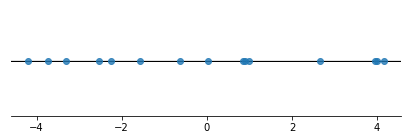

In [ ]:
fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,1,1)
#ax.set_xlim([-5,6.5]);ax.set_ylim([-0.5,0.5])
ax.arrow(x=-5,y=0,dx=11,dy=0,width=0.0001,head_width=0.1,head_length=0.2,length_includes_head=True,color='k')
ax.spines["right"].set_color("none");ax.spines["left"].set_color("none")
ax.spines["top"].set_color("none")
ax.scatter(data1D,0*data1D,label="Data",alpha=0.8,zorder=3000)
ax.set_yticks([])
plt.show();plt.close()

先程のKMeans関数を使ってこのデータをクラスタリングしてみましょう。  
まずはK=3の場合です。  

In [ ]:
knum=3 
KMmodel= KMeans(n_clusters=knum, init='k-means++').fit(data1D.reshape(-1,1))
print("cluster_center", KMmodel.cluster_centers_)
print("sum of distance", KMmodel.inertia_)
print("indices", KMmodel.labels_)

cluster_center [[-2.92712652]
 [ 3.69030713]
 [ 0.42093388]]
sum of distance 8.27623790425188
indices [0 0 0 0 0 2 2 2 2 0 1 1 1 2 1]


##### エルボー法によるクラスター数の決定

一般にK-means法でクラスタリングする際には、分類するクラスターの数それ自体が非自明です。  
ここでは、エルボー法として知られる方法で、クラスターの数を決定してみましょう。  

エルボー法では、クラスターを変動させたときの距離の二乗和の振る舞いから、
ふさわしいクラスター数を決定します。 ```knum```を少しずつ増やしながら、二乗和(```inertia_```の出力)の振る舞いをみてみましょう。


In [ ]:
sumV=[] ## 結果をまとめるための空の配列を作っておく
for knum in range(1,10):
  sumV += [ [knum, KMeans(n_clusters=knum, init='k-means++').fit(data1D.reshape(-1,1)).inertia_]]
sumV=np.array(sumV).T ## 転置を取る 
print(sumV)

[[  1.           2.           3.           4.           5.
    6.           7.           8.           9.        ]
 [115.0116751   29.43593519   8.2762379    4.29793698   2.51504002
    1.11588856   0.66944387   0.36627375   0.15357837]]


絵にしてみましょう。

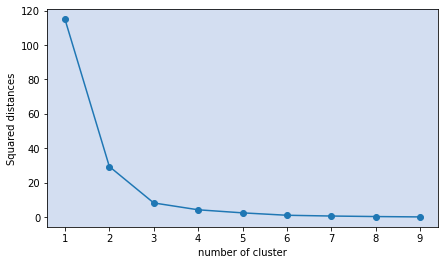

In [ ]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor("#D3DEF1")
ax.set_xlabel("number of cluster");ax.set_ylabel("Squared distances")
ax.plot(sumV[0],sumV[1],marker="o")
plt.show()
plt.close()

これをみるとK=2から3にかけて肘(エルボー)のように折れ曲がっていますので、
K=3くらいがだいたい良さそうなことがわかります。

エルボー法が絶対的なクラスター数を与えるわけではないことに注意

###### 二次元データのクラスタリング


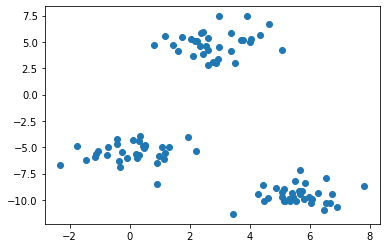

In [ ]:
from sklearn.datasets import make_blobs
X,unusedX=make_blobs(random_state=10) ##標準で用意されているデータセットをインポート
plt.scatter(X[:,0],X[:,1])

**練習**  
このデータXを使って、3つのクラスターに分類してみましょう。
KMeansライブラリで
1.   クラスター中心
2.   距離の二乗和
3.   ラベルを取得
を計算して、
4.   図にしてみよう(クラスターごとに色を変えたりできると良い)


### 補足
###### 特殊な形状のデータ


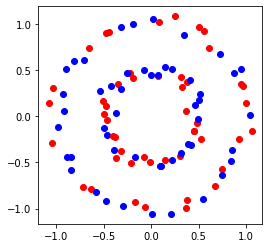

In [ ]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

N =100
noise=0.05
xy,z = make_circles(n_samples=N, factor=.5, noise=noise)

knum=2
km_model= KMeans(n_clusters=knum, init='k-means++', n_init=10, max_iter=300,
                    tol=0.0001,precompute_distances='auto', verbose=0,
                    random_state=None, copy_x=True, n_jobs=1).fit(xy.reshape(-1,1))
km_l = km_model.labels_

cols=["red","blue","green"]

plt.figure(figsize=(4,4)) 
for i, tmp in enumerate(xy):
    plt.scatter(xy[i][0],xy[i][1],color=cols[km_l[i]])
plt.show()
plt.close()


このように、特殊な形状な場合のクラスタリングにはK-means法は一般に有効ではなく、Spectral Clusteringなどの手法が必要です。